The CRISP-DM method will be applied here to keep track of the analysis process

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import geopandas

# 1.Business Understanding

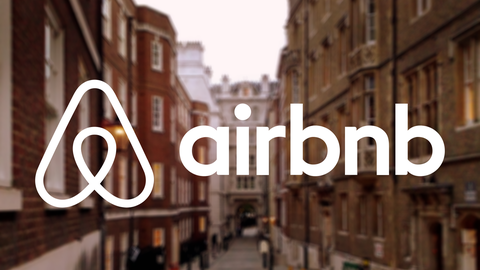

I downloaded Berlin Airbnb dataset via http://insideairbnb.com/get-the-data.html.  

For this project, I have been interested in using Berlin Airbnb dataset.

I will focus on these questions below:!
    
1)Which place is the average most expensive accommodation in Berlin?

2)What is the most expensive price on a room type basis?

3)What is the distribution of prices on the basis of latitude and longitude?

4)What is the most correlated three variable with price?

5)Please you can create a model about make a prediction of room price. 


# Berlin City Map

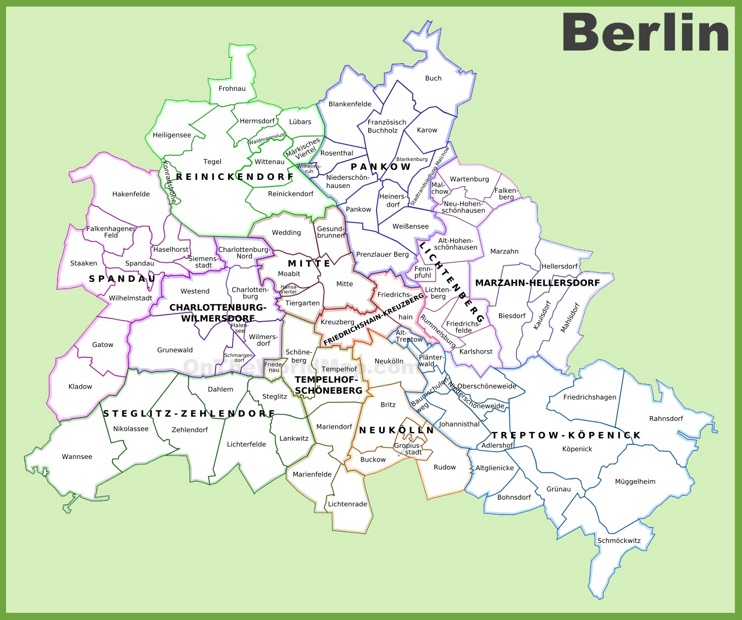

#resorce:http://ontheworldmap.com/germany/city/berlin/berlin-districts-map.html


# 2.Data Understanding

Berlin city Maps is located on below side.

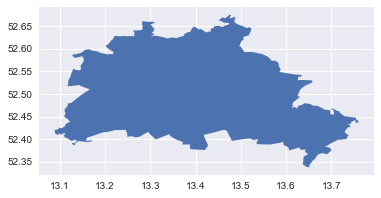

In [2]:
#Downloaded https://gist.github.com/pfloh/ae03cdabca0c822d5283 geojson and convert name to Berlin_map
countries_gdf = geopandas.read_file("Berlin_map.geojson")
countries_gdf.plot()

In [3]:
# load dataset
listings_df = pd.read_csv('listings.csv')
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,cafeheaven Pberg/Mitte/Wed for the summer 2019,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,21,120,18,2018-11-11,0.25,1,364
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,60,4,127,2019-09-05,3.03,5,170
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.16,1,349
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.36,1,262
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,126,2019-09-08,1.08,1,7


In [4]:
# number of data
listings_df.shape[0]

24422

In [5]:
# data format for each column
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24422 entries, 0 to 24421
Data columns (total 16 columns):
id                                24422 non-null int64
name                              24371 non-null object
host_id                           24422 non-null int64
host_name                         24390 non-null object
neighbourhood_group               24422 non-null object
neighbourhood                     24422 non-null object
latitude                          24422 non-null float64
longitude                         24422 non-null float64
room_type                         24422 non-null object
price                             24422 non-null int64
minimum_nights                    24422 non-null int64
number_of_reviews                 24422 non-null int64
last_review                       20286 non-null object
reviews_per_month                 20286 non-null float64
calculated_host_listings_count    24422 non-null int64
availability_365                  24422 non-null int64

In [6]:
# What kind information is provied?
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
#describe
listings_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.442200e+04,2.442200e+04,24422.000000,24422.000000,24422.000000,24422.000000,24422.000000,20286.000000,24422.000000,24422.000000
mean,1.967378e+07,6.925398e+07,52.509852,13.405645,72.654942,6.917247,20.514372,1.123973,2.183851,74.000942
std,1.110612e+07,7.704310e+07,0.031510,0.059636,228.393529,23.838359,43.127318,1.554836,4.429958,115.357343
min,1.944000e+03,2.058000e+03,52.345800,13.097180,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.922960e+06,1.055462e+07,52.489010,13.373900,33.000000,2.000000,1.000000,0.150000,1.000000,0.000000
50%,2.010907e+07,3.737860e+07,52.509305,13.416310,50.000000,3.000000,5.000000,0.510000,1.000000,1.000000
75%,2.907823e+07,1.061518e+08,52.532680,13.439578,75.000000,4.000000,18.000000,1.480000,2.000000,107.000000
max,3.873117e+07,2.961293e+08,52.656630,13.757640,9000.000000,1000.000000,582.000000,39.510000,49.000000,365.000000


# 3. Prepare Data

There are some necessary stpes to apply before continue exploring the dataset:

Drop unused columns

Convert string values to number

Handle missing values, drop them if necessary

In [8]:
# Drop unused columns
columns_to_drop = ['host_name','last_review']

listings_df.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
# Convert string to number
def listings_df_room_type(listings_df):
    """
    
    Convert room_type from words to integer for calculating the mean
    
    Parameters:
    listings_df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with room_type column becomes measurable
    
    """
    room_type_map = {
        'Entire home/apt' : 1,
        'Hotel room' : 2,
        'Private room' : 3,
        'Shared room' : 4,
        np.nan: np.nan
    }
    listings_df['room_type_num'] = listings_df['room_type'].apply(lambda x: np.nan if x == np.nan else room_type_map[x] )
    
    return listings_df

In [10]:
listings_df_room_type(listings_df)
listings_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num
0,1944,cafeheaven Pberg/Mitte/Wed for the summer 2019,2164,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,21,120,18,0.25,1,364,3
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,60,4,127,3.03,5,170,1
2,3176,Fabulous Flat in great Location,3718,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,1.16,1,349,1
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,0.36,1,262,3
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,126,1.08,1,7,1


In [11]:
# Convert string to number
def listings_df_neighbourhood_group(listings_df):
    """
    
    Convert neighbourhood_group from words to integer for calculating the mean
    
    Parameters:
    listings_df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with neighbourhood_group column becomes measurable
    
    """
    neighbourhood_group_map = {
'Friedrichshain-Kreuzberg' :1
,'Mitte' :2
,'Pankow' :3
,'Neukölln' :4
,'Charlottenburg-Wilm.' :5
,'Tempelhof - Schöneberg' :6
,'Lichtenberg' :7
,'Treptow - Köpenick' :8
,'Steglitz - Zehlendorf' :9
,'Reinickendorf' :10
,'Spandau' :11
,'Marzahn - Hellersdorf':12,
        np.nan: np.nan
    }
    listings_df['neighbourhood_group_num'] = listings_df['neighbourhood_group'].apply(lambda x: np.nan if x == np.nan else neighbourhood_group_map[x] )
    
    return listings_df

In [12]:
listings_df_neighbourhood_group(listings_df)
listings_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
0,1944,cafeheaven Pberg/Mitte/Wed for the summer 2019,2164,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,21,120,18,0.25,1,364,3,2
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,60,4,127,3.03,5,170,1,2
2,3176,Fabulous Flat in great Location,3718,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,1.16,1,349,1,3
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,0.36,1,262,3,6
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,126,1.08,1,7,1,1


In [13]:
# missing values
listings_df.isnull().sum()

id                                   0
name                                51
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4136
calculated_host_listings_count       0
availability_365                     0
room_type_num                        0
neighbourhood_group_num              0
dtype: int64

In [14]:
# drop columns
missing_columns_to_drop = ['name','reviews_per_month']

listings_df.drop(missing_columns_to_drop, axis=1, inplace=True)

In [15]:
# missing values check
listings_df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_num                     0
neighbourhood_group_num           0
dtype: int64

# 4. Answer Questions base on dataset

### Question 1
Which place is the average most expensive accommodation in Berlin?

In [16]:
listings_df.neighbourhood_group.value_counts()

Friedrichshain-Kreuzberg    5830
Mitte                       5061
Pankow                      3810
Neukölln                    3717
Charlottenburg-Wilm.        1798
Tempelhof - Schöneberg      1634
Lichtenberg                  761
Treptow - Köpenick           677
Steglitz - Zehlendorf        506
Reinickendorf                318
Spandau                      159
Marzahn - Hellersdorf        151
Name: neighbourhood_group, dtype: int64

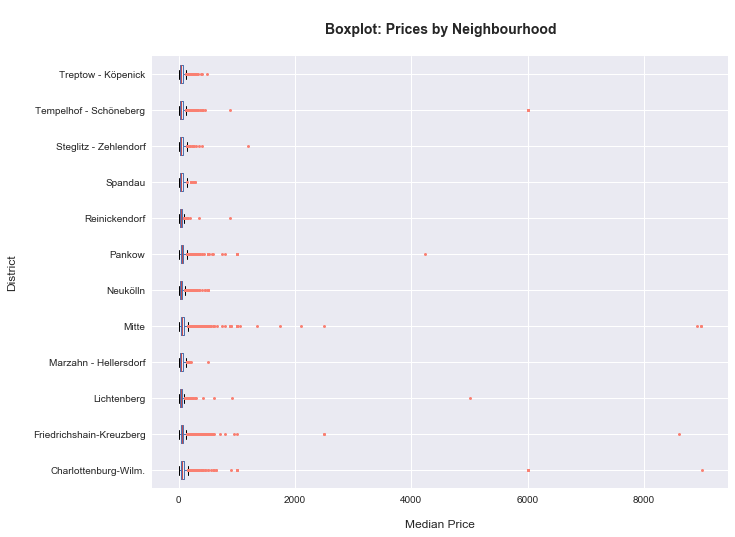

In [17]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

listings_df.boxplot(column='price', by='neighbourhood_group', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

In [18]:
def display_bar_chart (df,column, title):
    '''
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals=df[column].value_counts()
    (status_vals[:20]/df.shape[0]).plot(kind="bar");
    plt.title(title);
    

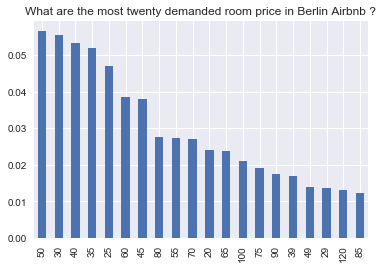

In [19]:
#Provide a pandas series of the counts for each Price
display_bar_chart(listings_df, "price", "What are the most twenty demanded room price in Berlin Airbnb ?")

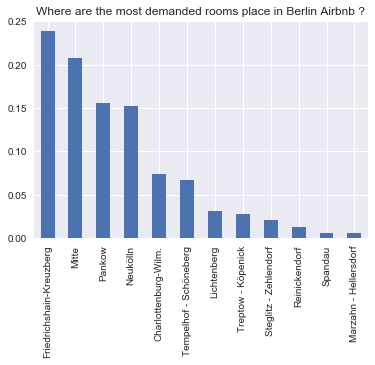

In [20]:
#Provide a pandas series of the counts for each neighbourhood_group
display_bar_chart(listings_df, "neighbourhood_group", "Where are the most demanded rooms place in Berlin Airbnb ?")

In [21]:
#Compare selected neighbourhood_group based on average room price
listings_df.groupby(['neighbourhood_group'])['price'].mean()

neighbourhood_group
Charlottenburg-Wilm.        111.719689
Friedrichshain-Kreuzberg     66.033448
Lichtenberg                  58.856767
Marzahn - Hellersdorf        59.430464
Mitte                        83.081012
Neukölln                     50.086360
Pankow                       71.639370
Reinickendorf                49.097484
Spandau                      57.691824
Steglitz - Zehlendorf        62.073123
Tempelhof - Schöneberg       97.331701
Treptow - Köpenick           59.000000
Name: price, dtype: float64

Charlottenburg-Wilm. is the average most expensive accomodation place in Berlin

### Question 2
What is the most expensive price on a room type basis?

In [22]:
listings_df.room_type.value_counts()

Entire home/apt    12136
Private room       11638
Hotel room           348
Shared room          300
Name: room_type, dtype: int64

In [23]:
#Compare selected room type based on average price
listings_df.groupby(['room_type'])['price'].max()

room_type
Entire home/apt    9000
Hotel room         8983
Private room       8600
Shared room         260
Name: price, dtype: int64

Entire home/apt is most expensive price on a room type basis. This price is 9.000€. 

### Question 3
What is the distribution of prices on the basis of latitude and longitude?

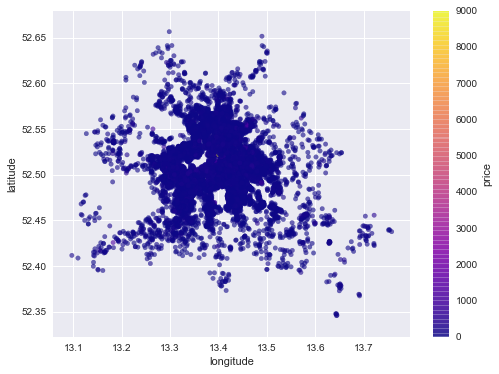

In [24]:
plot=listings_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6, figsize=(8,6), 
        c="price", cmap="plasma", colorbar=True ,sharex=False);
plot

Distribution of prices is on the basis of latitude and longitude on above side.

### Question 4
What is the most correlated three variable with price?

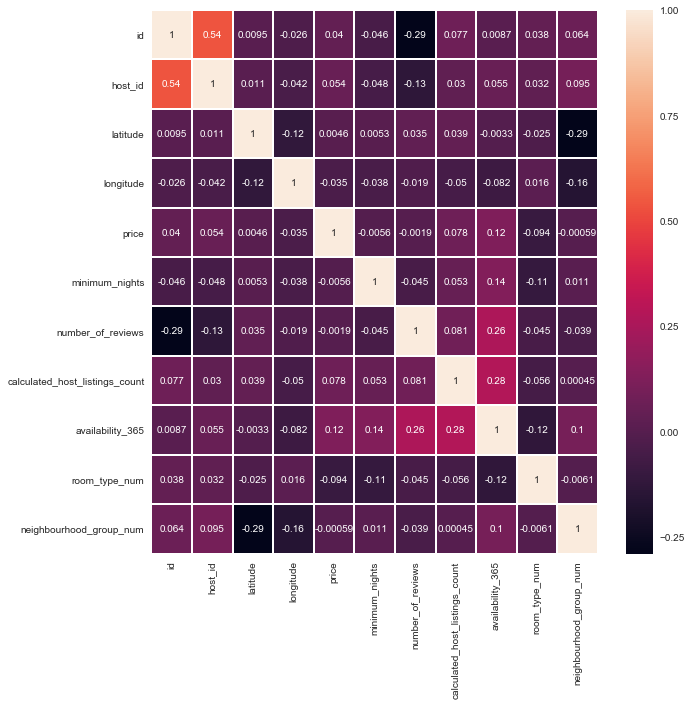

In [25]:
ax = plt.subplots( figsize=(10,10) )
sns.heatmap(listings_df.corr(),annot=True,linewidths=1)
plt.show()

Availability_365 is that the most correlated with price. Correlation is 0.12. 

### Question 5
Please you can create a model about make a prediction of room price. 

In [26]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
listings_df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'room_type_num', 'neighbourhood_group_num'],
      dtype='object')

In [28]:
X=listings_df.drop(['id', 'host_id', 'neighbourhood_group', 'neighbourhood','room_type','price'],axis=1)
y=listings_df['price']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (19537, 8)
y_train Shape: (19537,)
X_test Shape: (4885, 8)
y_test Shape: (4885,)


In [31]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,100]
# Instantiate model with 2-100 decision trees
for i in estimators:
    rf = RandomForestRegressor(n_estimators = i, random_state = 42)
# Train the model on training data
    rf.fit(X_train, y_train);
    print('estimators:',i)
# Use the forest's predict method on the test data
    predictions = rf.predict(X_test)
# Calculate the absolute errors
    errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

estimators: 2
Mean Absolute Error: 35.92 degrees.
estimators: 5
Mean Absolute Error: 34.55 degrees.
estimators: 10
Mean Absolute Error: 32.78 degrees.
estimators: 15
Mean Absolute Error: 31.85 degrees.
estimators: 20
Mean Absolute Error: 31.2 degrees.
estimators: 25
Mean Absolute Error: 30.98 degrees.
estimators: 30
Mean Absolute Error: 31.17 degrees.
estimators: 35
Mean Absolute Error: 30.86 degrees.
estimators: 40
Mean Absolute Error: 30.7 degrees.
estimators: 45
Mean Absolute Error: 30.44 degrees.
estimators: 50
Mean Absolute Error: 30.24 degrees.
estimators: 55
Mean Absolute Error: 30.08 degrees.
estimators: 60
Mean Absolute Error: 30.22 degrees.
estimators: 65
Mean Absolute Error: 30.23 degrees.
estimators: 70
Mean Absolute Error: 30.11 degrees.
estimators: 75
Mean Absolute Error: 30.14 degrees.
estimators: 80
Mean Absolute Error: 30.13 degrees.
estimators: 100
Mean Absolute Error: 29.82 degrees.


We can choose estimators:100 and create model again.

In [33]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 29.82 degrees.


# 5.Conculsion
We can create a model via Random Forest Regressor for prediction price

We can say that room price is higher than other place at city of centre.

We can observe that customers demand to Entire home/apt and Private room in Airbnb.

The most popular places for accomadation in Berlin that is Friedrichshain-Kreuzberg and Mitte in Airbnb.

If you can stay in Mitte, you will visit this link https://www.airbnb.com.tr/a/Mitte--Germany

If you can stay in Mitte, you will visit this link https://www.airbnb.com.tr/s/Friedrichshain~Kreuzberg--Berlin--Germany

# 6. References

Airbnb Berlin, Germany  http://insideairbnb.com/get-the-data.html. 
    
    Date Compiled:19 September, 2019

Berlin Map http://ontheworldmap.com/germany/city/berlin/berlin-districts-map.html

Berlin Map Geojson https://gist.github.com/pfloh/ae03cdabca0c822d5283